#LeNet Architcture

Connecting to Google Drive

In [1]:
# Connect to Google Drive to access dataset
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
training_path = r"/content/gdrive/MyDrive/DATASET/Training"
testing_path = r"/content/gdrive/MyDrive/DATASET/Testing"
validation_path = r"/content/gdrive/MyDrive/DATASET/Validation"

# Importing Libraries

In [3]:
import os
from pathlib import Path

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline

# Image-Preprocessing

In [6]:
classes = os.listdir(training_path)
classes

['malignant', 'benign', 'normal']

In [7]:
paths = Path(training_path)

#paths.glob('**/*.png') is used to get all the file paths of png images recursively in the paths 
path_images = list(paths.glob('**/*.png'))
images_paths = [str(path_image) for path_image in path_images ]
print(f'Number of training images: {len(images_paths)}')

#creates a list labels which contains the label of each image in the images_paths list
labels = [os.path.split(os.path.split(name)[0])[1] for name in images_paths]

Number of training images: 623


Random Training Images: 


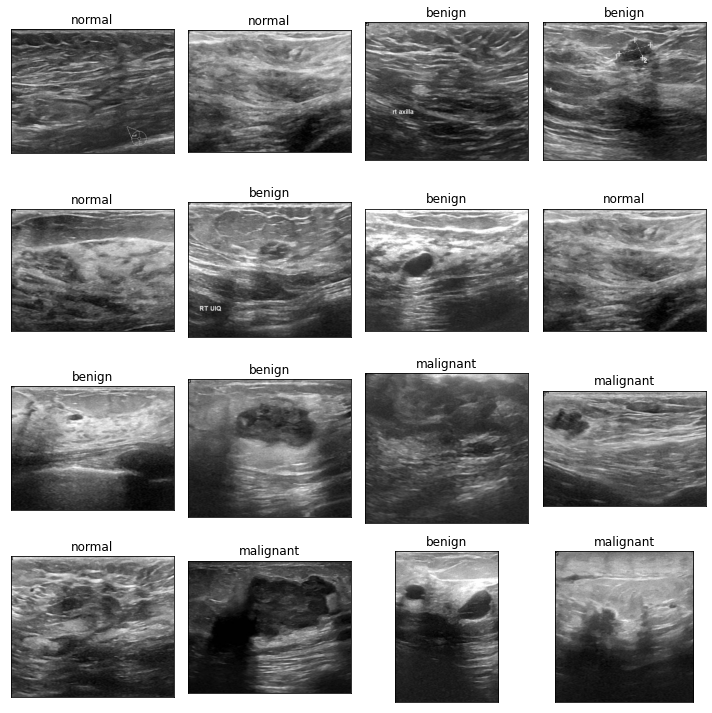

In [8]:

# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(images_paths), 16)
fig, axes = plt.subplots(4,4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

print('Random Training Images: ')

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(images_paths[random_index[i]]))
    ax.set_title(labels[random_index[i]])
plt.tight_layout()
plt.show()

#Normalization

In [56]:
pretrained_size = 32
pretrained_means = [0.485, 0.456, 0.406]
pretrained_stds = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.RandomCrop(pretrained_size, padding=10),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=pretrained_means,
                                                std=pretrained_stds),
                           transforms.Grayscale(num_output_channels=1)
                       ])

test_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=pretrained_means,
                                                std=pretrained_stds)
                       ])

valid_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=pretrained_means,
                                                std=pretrained_stds)
                       ])
train_dataset1 = torchvision.datasets.ImageFolder(root= training_path, transform = train_transforms)

In [57]:
transforms2 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
train_dataset2 = torchvision.datasets.ImageFolder(root= training_path, transform = transforms2)

In [58]:
transforms3 = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
train_dataset3 = torchvision.datasets.ImageFolder(root= training_path, transform = transforms3)


In [59]:
transforms4 = transforms.Compose([ 
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
train_dataset4 = torchvision.datasets.ImageFolder(root= training_path, transform = transforms4)


In [60]:
#size = (224, 224)
# transforms5 = transforms.Compose([ 
#     transforms.TenCrop(size, vertical_flip=False),
#     transforms.ToTensor(),
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
# ])
# train_dataset5 = torchvision.datasets.ImageFolder(root= training_path, transform = transforms5)

# Splitting the Dataset

In [61]:
train_dataset = torch.utils.data.ConcatDataset([train_dataset1, train_dataset2, train_dataset3, train_dataset4])
test_dataset = torchvision.datasets.ImageFolder(root= testing_path, transform = train_transforms)
valid_dataset = torchvision.datasets.ImageFolder(root= validation_path, transform = train_transforms)

In [62]:
len(train_dataset)

2492

In [63]:
len(test_dataset)

155

In [64]:
len(valid_dataset)


154

In [65]:
# Hyper parameters
num_epochs = 20
num_classes = 3
batch_size = 64
learning_rate = 0.001

In [66]:
# CPU or GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda', index=0)

In [67]:
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True,num_workers=2)
valid_loader = DataLoader(dataset = test_dataset,  batch_size = batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset = valid_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

# Designing a Convolution Neural Network (CNN): LeNet

In [68]:
epochs = 20
batch_size = 64
learning_rate = 0.001

In [69]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv3 = nn.Conv2d(
            in_channels=16,
            out_channels=120,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(
            self.conv3(x)
        )  # num_examples x 120 x 1 x 1 --> num_examples x 120
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x


In [70]:
model = LeNet()
print(model)

LeNet(
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=3, bias=True)
)


# Loss & Optimization

In [71]:
model = LeNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

#Adam optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)  


In [72]:
%%time
# keeping-track-of-losses and accuracy
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(1, epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    train_acc = 0.0
    valid_acc = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-single-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss and accuracy
        train_loss += loss.item() * data.size(0)
        _, pred = torch.max(output, 1)
        train_acc += torch.sum(pred == target.data)
        
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss and accuracy
        valid_loss += loss.item() * data.size(0)
        _, pred = torch.max(output, 1)
        valid_acc += torch.sum(pred == target.data)
    
    # calculate-average-losses and accuracy
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(100. * train_acc/len(train_loader.sampler))
    valid_accuracies.append(100. * valid_acc/len(valid_loader.sampler))
        
    # print-training/validation-statistics 
    print('Epoch: [{}/{}] \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} '.format(
        epoch, epochs, train_loss, valid_loss,))
    print('Training Accuracy: {:.6f}% '.format(
         train_accuracies[-1]))
    print('Validation Accuracy: {:.6f}%\n'.format(
         valid_accuracies[-1]))


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa037014430>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


RuntimeError: ignored

# Testing

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#For overfitting and under fitting
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [ ]:
import numpy

In [ ]:
preds = []
target = []
probabilities = []
individual_prob = []

for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            outputs = nn.Softmax(dim=1)(outputs)
            prob, predicted = torch.max(outputs.data, 1)
            #Tensor from GPU to CPU by converting pytorch numpy to tensor array
            predicted = predicted.cpu().numpy()
            outputs = outputs.cpu().detach().numpy()
            prob = prob.cpu().detach().numpy()
            labels = labels.cpu().numpy()
            preds.append(predicted)
            target.append(labels)
            #Finding probabilies for each probabilities
            probabilities.append(list(outputs))
            individual_prob.append(list(prob))
            
        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Converting 2-D into 1-D array

In [ ]:
probabilities1 = []
for i in probabilities:
  for j in i:
    probabilities1.append(j)

In [ ]:
individual_prob1 = []
for i in individual_prob:
  for j in i:
    individual_prob1.append(j)

In [ ]:
preds1 = []
for i in preds:
  for j in i:
    preds1.append(j)

In [ ]:
target1 = []
for i in target:
  for j in i:
    target1.append(j)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(target1,preds1))

In [ ]:
confusion_matrix(target1,preds1)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn .metrics import roc_auc_score, roc_curve
import seaborn as sns


In [ ]:
def plot_cm(confusion):
  sns.heatmap(confusion, annot=True,  square=True)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix', size=18)
  plt.tight_layout()

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(target1, preds1, labels=[0,1,2])
plot_cm(confusion)

In [ ]:
auc = np.round(roc_auc_score(target1, probabilities1, multi_class = 'ovr'), 3)
print("Auc score for our sample data is {}". format(auc))

In [ ]:
probabilities2 = np.array([i for i in probabilities1])

In [ ]:
def plot_multiclass_roc(y_score, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    threshold = dict()

    for i in range(n_classes):    
      fpr[i], tpr[i], threshold[i] = roc_curve(target1, probabilities2[:,i], pos_label=i)
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label = 'class '+ str(i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(probabilities2, target1, n_classes=3, figsize=(12,8))